# **1.Data Collection**
In the collected datset , we the attributes Age ,Family Size , Income ,Monthly expenses ,Existing investments and assets, Debt obligations ,Financial goals,Risk tolerance level as independent Variable along with the Dependent variable Predicted Investment Return and Investment Category.It may have some missing values so, will go for the Data preprocessing .

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/Hirademy_Dataset.csv')

features = df.drop(columns=['Predicted Investment Return', 'Investment Category'])
target = df[['Predicted Investment Return', 'Investment Category']]

print(features.head())
print(target.head())


    Age  Family size and dependents    Income  Monthly expenses  \
0  56.0                         5.0  141041.0            1026.0   
1  69.0                         4.0  146185.0            3160.0   
2  46.0                         5.0   40350.0            2672.0   
3  32.0                         4.0  130859.0             779.0   
4  60.0                         2.0   98487.0            3464.0   

   Existing investments and assets  Debt obligations Financial goals  \
0                         580178.0           19510.0  buying a house   
1                         410010.0           12120.0      retirement   
2                         567176.0           99847.0       education   
3                         147821.0           98575.0  buying a house   
4                              NaN          391413.0       education   

  Risk tolerance level  
0               medium  
1                  NaN  
2               medium  
3               medium  
4                  low  
   Predicted I

# **2.Data Preprocessing**

### **2.1:Imputing Missing Values for Numerical Columns**

In [ ]:
from sklearn.impute import SimpleImputer

numerical_cols = features.select_dtypes(include=['int64', 'float64']).columns

numerical_imputer = SimpleImputer(strategy='mean')

features[numerical_cols] = numerical_imputer.fit_transform(features[numerical_cols])

print(features.head())


    Age  Family size and dependents    Income  Monthly expenses  \
0  56.0                         5.0  141041.0            1026.0   
1  69.0                         4.0  146185.0            3160.0   
2  46.0                         5.0   40350.0            2672.0   
3  32.0                         4.0  130859.0             779.0   
4  60.0                         2.0   98487.0            3464.0   

   Existing investments and assets  Debt obligations Financial goals  \
0                    580178.000000           19510.0  buying a house   
1                    410010.000000           12120.0      retirement   
2                    567176.000000           99847.0       education   
3                    147821.000000           98575.0  buying a house   
4                    510665.056842          391413.0       education   

  Risk tolerance level  
0               medium  
1                  NaN  
2               medium  
3               medium  
4                  low  


**Conclusion**:- The dataset will no longer have missing values in the numerical columns. This is important for machine learning algorithms that typically cannot handle missing data directly.

### **2.2: Imputing Missing Values for Categorical Columns**

In [ ]:
# Identify categorical columns
categorical_cols = features.select_dtypes(include=['object']).columns

# For categorical columns, we'll use the most frequent value to impute missing values
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Apply the categorical imputer
features[categorical_cols] = categorical_imputer.fit_transform(features[categorical_cols])

# Display the first few rows after imputing missing values
print(features.head())


    Age  Family size and dependents    Income  Monthly expenses  \
0  56.0                         5.0  141041.0            1026.0   
1  69.0                         4.0  146185.0            3160.0   
2  46.0                         5.0   40350.0            2672.0   
3  32.0                         4.0  130859.0             779.0   
4  60.0                         2.0   98487.0            3464.0   

   Existing investments and assets  Debt obligations Financial goals  \
0                    580178.000000           19510.0  buying a house   
1                    410010.000000           12120.0      retirement   
2                    567176.000000           99847.0       education   
3                    147821.000000           98575.0  buying a house   
4                    510665.056842          391413.0       education   

  Risk tolerance level  
0               medium  
1               medium  
2               medium  
3               medium  
4                  low  


### **2.3.Handeling Outliers**

In [ ]:
# Outlier detection and handling using z-score
def handle_outliers(df, cols):
    for col in cols:
        mean = df[col].mean()
        std = df[col].std()
        threshold = 3  # Z-score threshold
        outliers = (df[col] - mean).abs() > threshold * std
        df.loc[outliers, col] = np.nan  # Replace outliers with NaN to be imputed later
    return df

# Handle outliers in numerical columns
features = handle_outliers(features, numerical_cols)

# Re-impute missing values after handling outliers
features[numerical_cols] = numerical_imputer.fit_transform(features[numerical_cols])

# Display the first few rows after handling outliers
print(features.head())


    Age  Family size and dependents    Income  Monthly expenses  \
0  56.0                         5.0  141041.0            1026.0   
1  69.0                         4.0  146185.0            3160.0   
2  46.0                         5.0   40350.0            2672.0   
3  32.0                         4.0  130859.0             779.0   
4  60.0                         2.0   98487.0            3464.0   

   Existing investments and assets  Debt obligations Financial goals  \
0                    580178.000000           19510.0  buying a house   
1                    410010.000000           12120.0      retirement   
2                    567176.000000           99847.0       education   
3                    147821.000000           98575.0  buying a house   
4                    510665.056842          391413.0       education   

  Risk tolerance level  
0               medium  
1               medium  
2               medium  
3               medium  
4                  low  


### **2.4.Encoding Categorical Variables**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# OneHotEncoder for categorical features
encoder = OneHotEncoder(handle_unknown='ignore')

# Apply the encoder to categorical features
encoded_features = encoder.fit_transform(features[categorical_cols]).toarray()

# Convert encoded features to DataFrame
encoded_features_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))

# Combine encoded categorical features with the numerical features
features_final = pd.concat([features.drop(columns=categorical_cols).reset_index(drop=True), encoded_features_df], axis=1)

# Display the first few rows after encoding categorical features
print(features_final.head())


    Age  Family size and dependents    Income  Monthly expenses  \
0  56.0                         5.0  141041.0            1026.0   
1  69.0                         4.0  146185.0            3160.0   
2  46.0                         5.0   40350.0            2672.0   
3  32.0                         4.0  130859.0             779.0   
4  60.0                         2.0   98487.0            3464.0   

   Existing investments and assets  Debt obligations  \
0                    580178.000000           19510.0   
1                    410010.000000           12120.0   
2                    567176.000000           99847.0   
3                    147821.000000           98575.0   
4                    510665.056842          391413.0   

   Financial goals_buying a house  Financial goals_education  \
0                             1.0                        0.0   
1                             0.0                        0.0   
2                             0.0                        1.0   
3   

### **2.5.Normalizing Numerical Features**

In [ ]:
from sklearn.preprocessing import StandardScaler

# StandardScaler for numerical features
scaler = StandardScaler()

# Apply the scaler to numerical features
scaled_numerical_features = scaler.fit_transform(features_final[numerical_cols])

# Convert scaled numerical features to DataFrame
scaled_numerical_features_df = pd.DataFrame(scaled_numerical_features, columns=numerical_cols)

# Combine scaled numerical features with the encoded categorical features
features_final[numerical_cols] = scaled_numerical_features_df

# Display the first few rows after normalizing numerical features
print(features_final.head())


        Age  Family size and dependents    Income  Monthly expenses  \
0  0.834829                    0.874920  0.520045         -1.352873   
1  1.726131                    0.273709  0.626240          0.322580   
2  0.149212                    0.874920 -1.558657         -0.060560   
3 -0.810652                    0.273709  0.309844         -1.546798   
4  1.109076                   -0.928713 -0.358456          0.561258   

   Existing investments and assets  Debt obligations  \
0                         0.249636         -1.688101   
1                        -0.361475         -1.741439   
2                         0.202943         -1.108259   
3                        -1.303053         -1.117440   
4                         0.000000          0.996154   

   Financial goals_buying a house  Financial goals_education  \
0                             1.0                        0.0   
1                             0.0                        0.0   
2                             0.0           

**Conclusion:-** In this process of the Normalization ,Numerical features are transformed to have a mean of 0 and a standard deviation of 1.

### **2.6.Handling Target Variables**

In [ ]:
target_imputer = SimpleImputer(strategy='mean')
target['Predicted Investment Return'] = target_imputer.fit_transform(target[['Predicted Investment Return']])

target['Investment Category'] = target['Investment Category'].fillna(target['Investment Category'].mode()[0])

target_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
target_encoded = target_encoder.fit_transform(target[['Investment Category']])

target_encoded_df = pd.DataFrame(target_encoded, columns=target_encoder.get_feature_names_out(['Investment Category']))

print(target.head())
print(target_encoded_df.head())


   Predicted Investment Return Investment Category
0                     0.096960              stocks
1                     0.081804               bonds
2                     0.007681               bonds
3                     0.111825               bonds
4                     0.075800         real estate
   Investment Category_bonds  Investment Category_mutual funds  \
0                        0.0                               0.0   
1                        1.0                               0.0   
2                        1.0                               0.0   
3                        1.0                               0.0   
4                        0.0                               0.0   

   Investment Category_real estate  Investment Category_stocks  
0                              0.0                         1.0  
1                              0.0                         0.0  
2                              0.0                         0.0  
3                              0.0   

<ipython-input-7-b1f52a1f7986>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Predicted Investment Return'] = target_imputer.fit_transform(target[['Predicted Investment Return']])
<ipython-input-7-b1f52a1f7986>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Investment Category'] = target['Investment Category'].fillna(target['Investment Category'].mode()[0])


**Conclusion :-**
<ul>Imputes missing values in both target variables.
<ul>Encodes the categorical target variable for use in machine learning models.
<ul>Transforms the data to prepare it for model training.

### **2.7.Combining Features and Target Variables, and Saving the Preprocessed Data**

In [ ]:

final_df = pd.concat([features_final, target['Predicted Investment Return'], target_encoded_df], axis=1)

final_df.to_csv('investment_data_preprocessed.csv', index=False)

print("Data preprocessing completed and saved as 'investment_data_preprocessed.csv'")


Data preprocessing completed and saved as 'investment_data_preprocessed.csv'


### **2.8.Downloading the preprocessed Data**

In [ ]:
from google.colab import files

# Download the preprocessed CSV file
files.download('investment_data_preprocessed.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **3.Exploratory Data Analysis (EDA)**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the preprocessed dataset
df = pd.read_csv('/content/investment_data_preprocessed.csv')

### **3.1. Undestand the structure of the dataset**

In [ ]:
print("Dataset Shape:", df.shape)
print("Dataset Info:")
print(df.info())
print("Statistical Summary:")
print(df.describe())

Dataset Shape: (2000, 18)
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               2000 non-null   float64
 1   Family size and dependents        2000 non-null   float64
 2   Income                            2000 non-null   float64
 3   Monthly expenses                  2000 non-null   float64
 4   Existing investments and assets   2000 non-null   float64
 5   Debt obligations                  2000 non-null   float64
 6   Financial goals_buying a house    2000 non-null   float64
 7   Financial goals_education         2000 non-null   float64
 8   Financial goals_retirement        2000 non-null   float64
 9   Financial goals_vacation          2000 non-null   float64
 10  Risk tolerance level_high         2000 non-null   float64
 11  Risk tolerance level_low     

### **3.2.Distribution of Key Variables**

### 3.2.1.Plotting Histogram for Key Variables

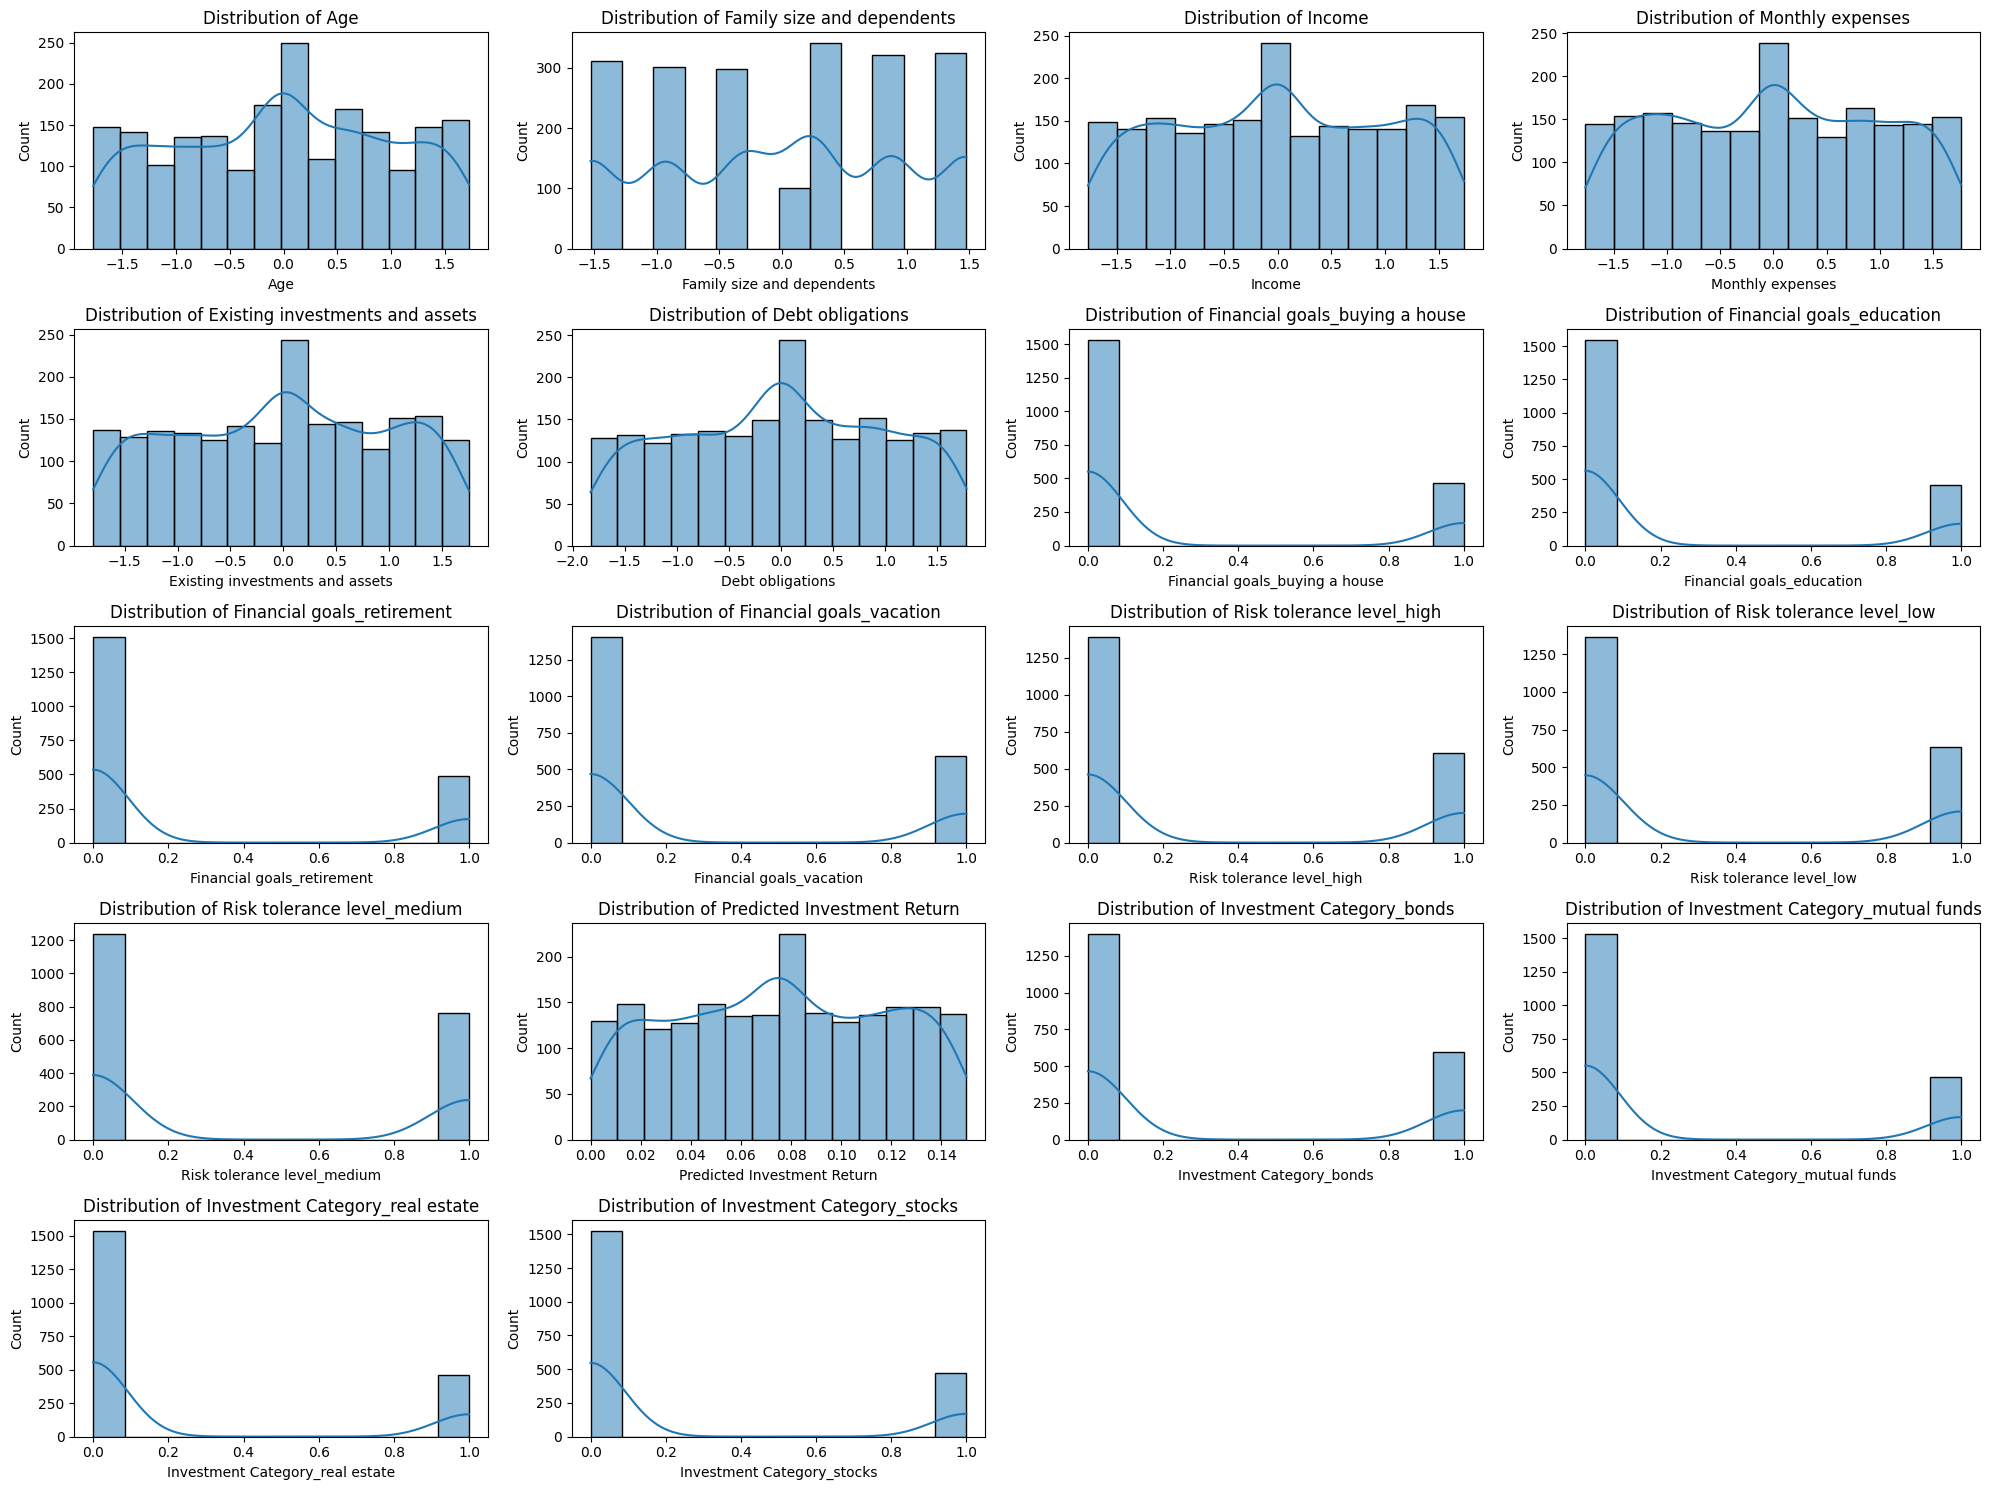

In [ ]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(5, 4, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

### 3.2.2.Plot count plots for categorical variables

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col)
    plt.title(f'Count plot of {col}')
plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

### **3.3.Relationships Between Variables**

### **3.3.1.Scatter plots for numerical variables against the target variable 'Predicted Investment Return'**

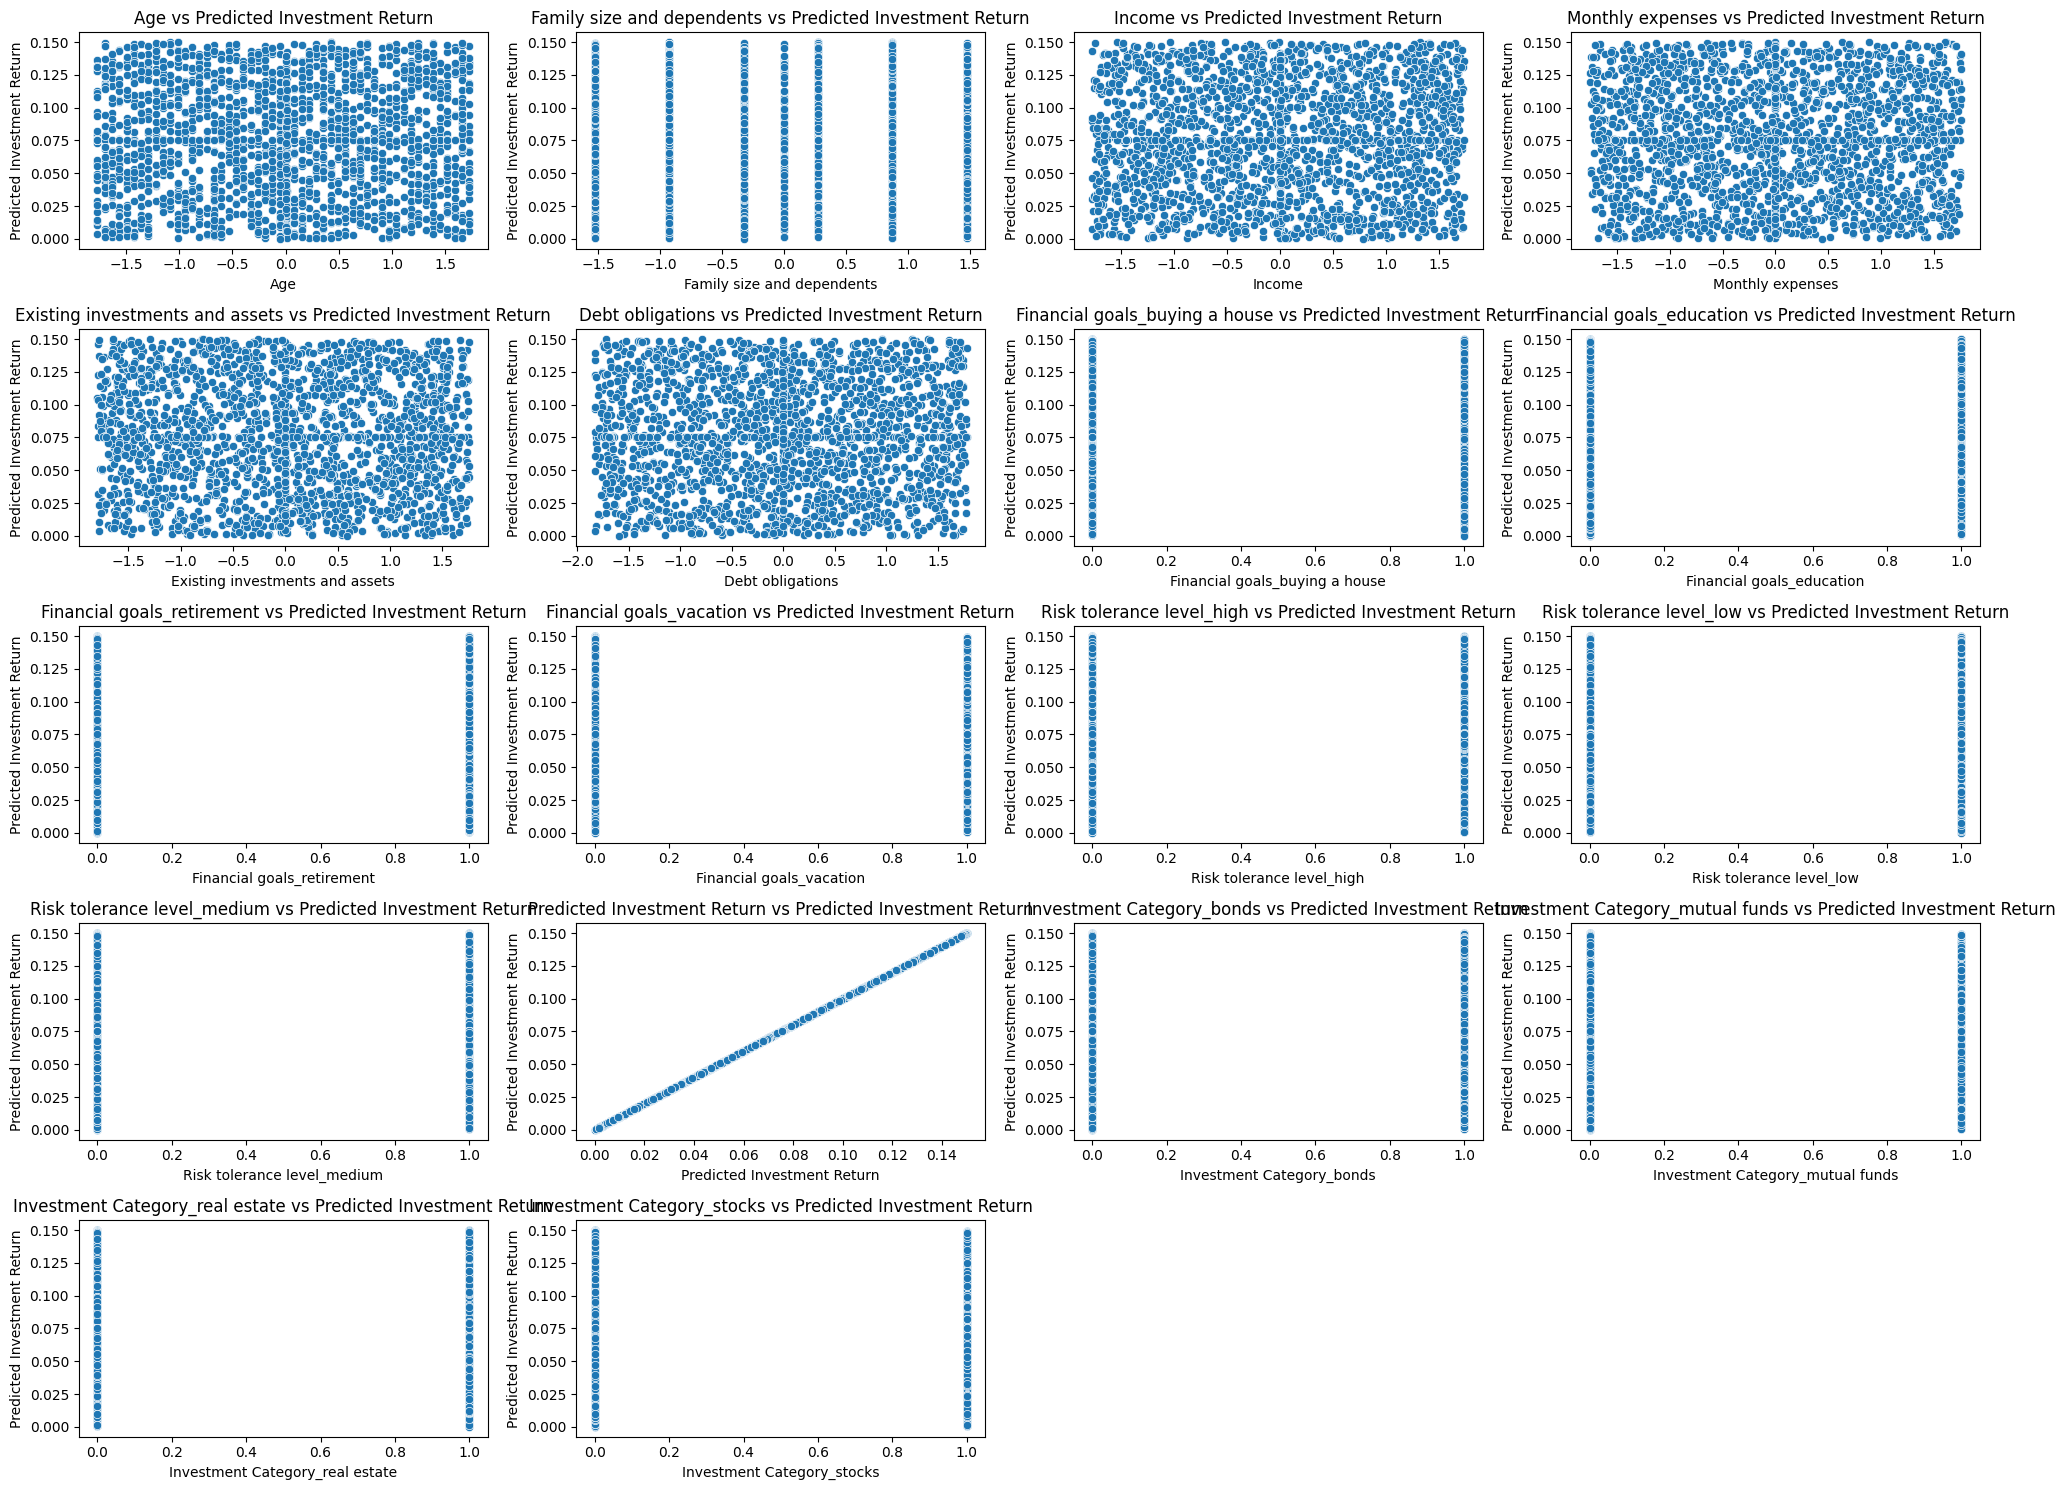

In [ ]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(5, 4, i)
    sns.scatterplot(data=df, x=col, y='Predicted Investment Return')
    plt.title(f'{col} vs Predicted Investment Return')
plt.tight_layout()
plt.show()

### **3.3.2.Box plots to see the distribution of numerical variables across different investment categories**

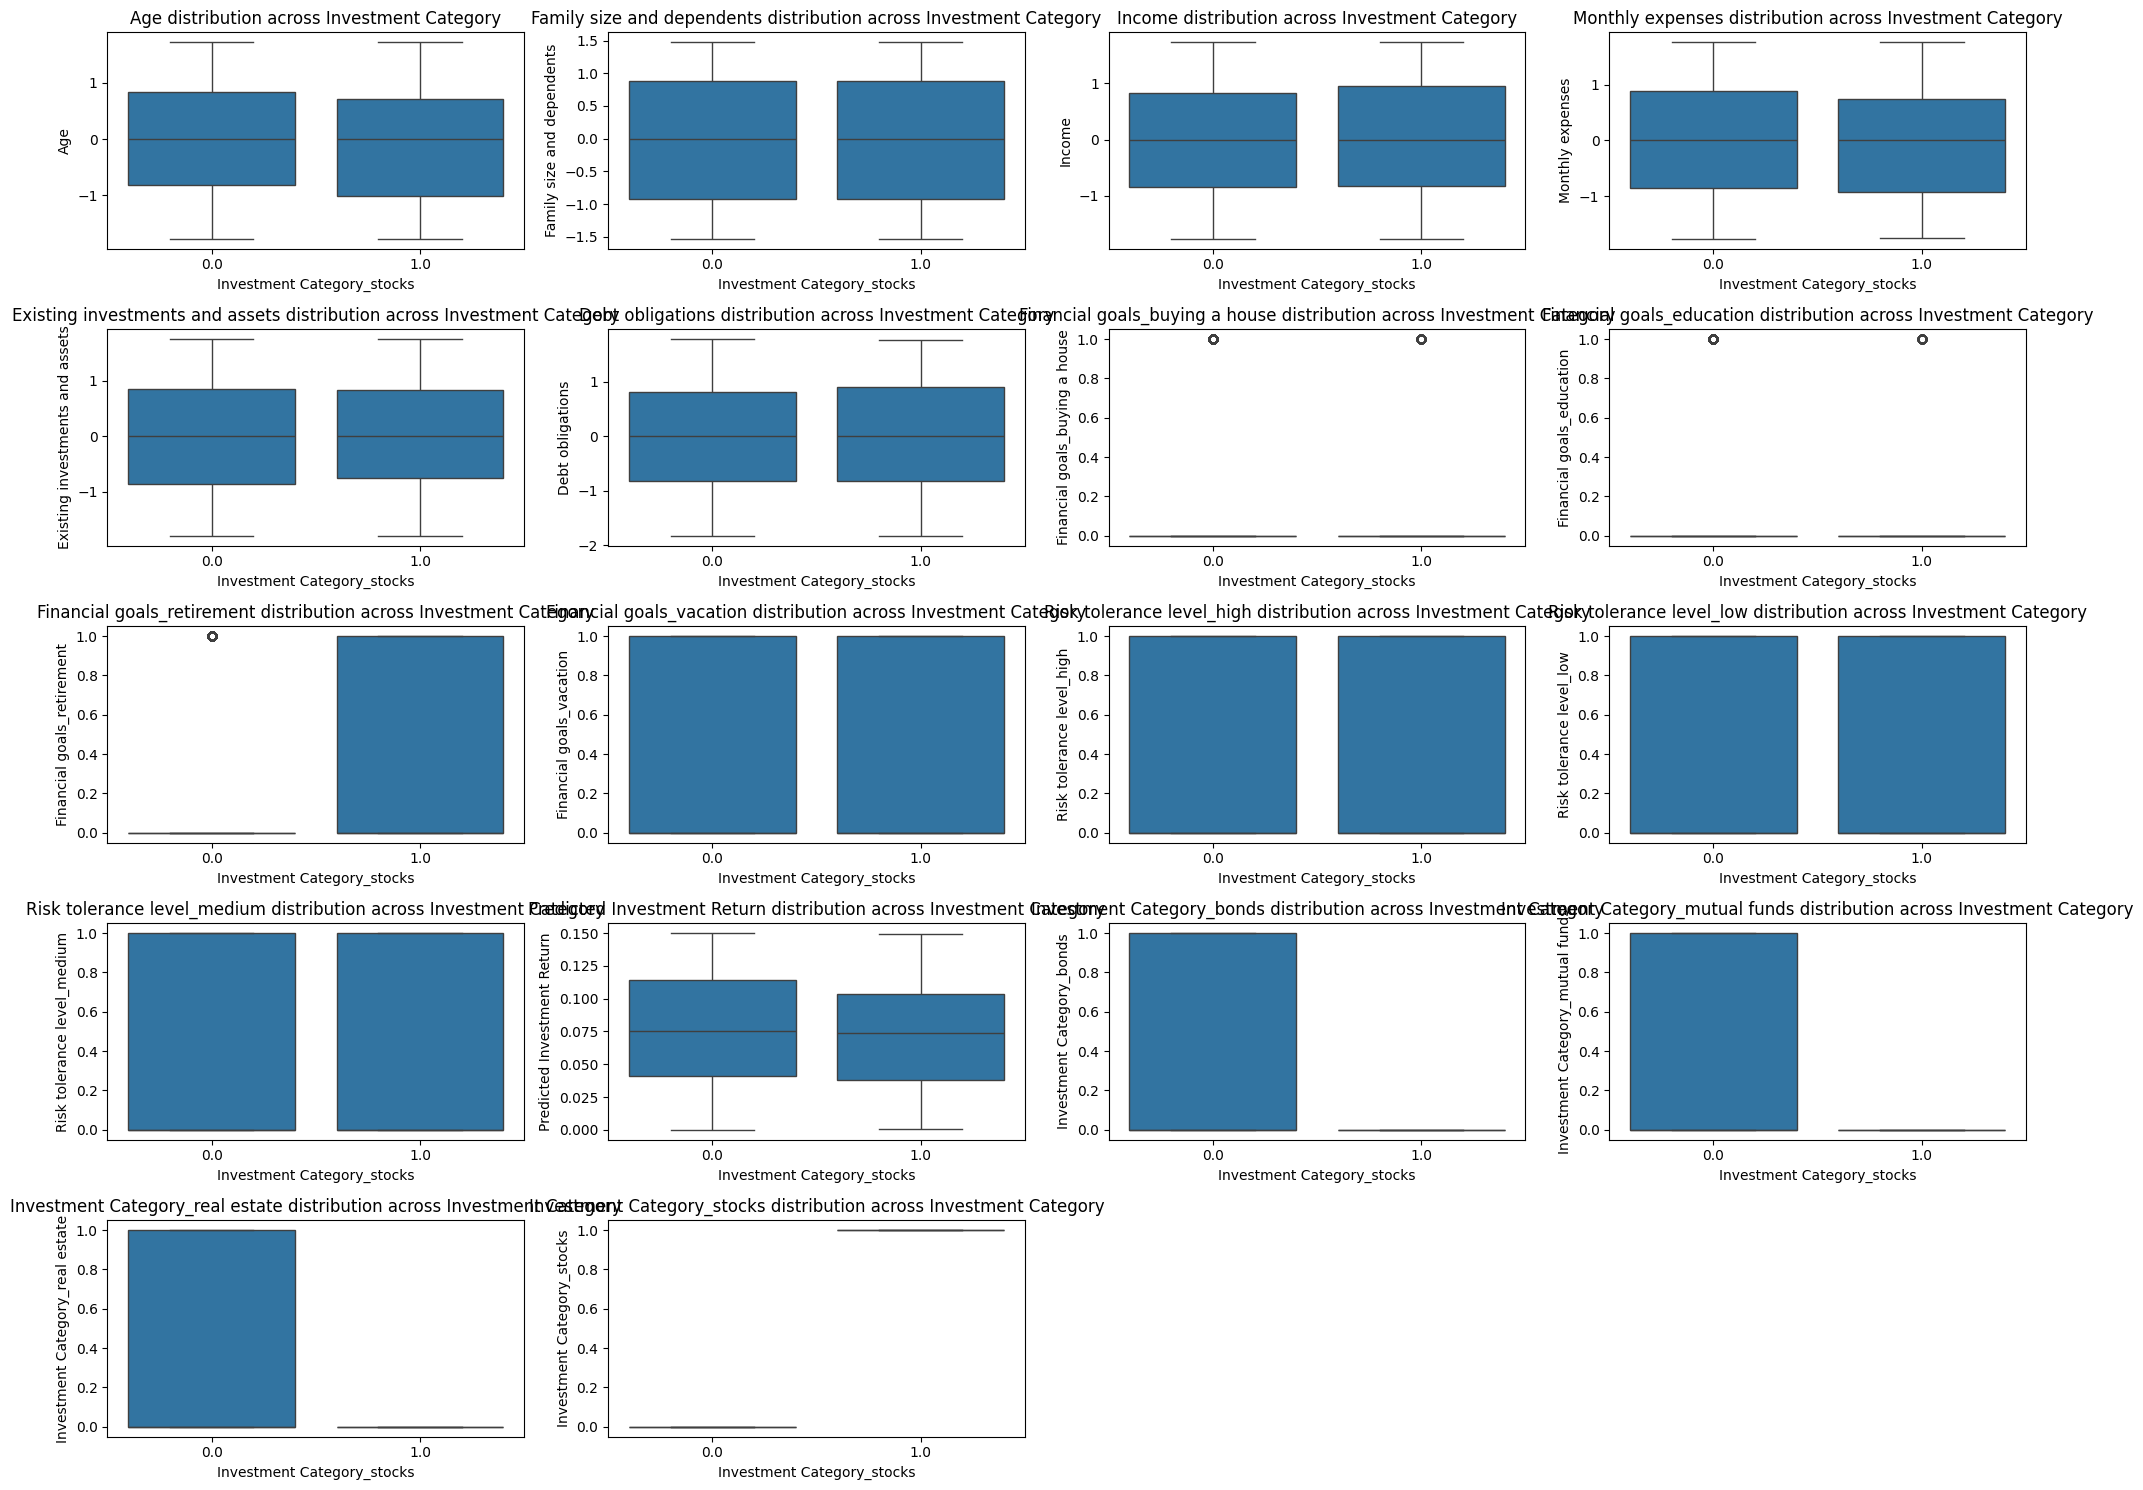

In [ ]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(data=df, x='Investment Category_stocks', y=col)
    plt.title(f'{col} distribution across Investment Category')
plt.tight_layout()
plt.show()

### **3.4.Corelational Analysis**

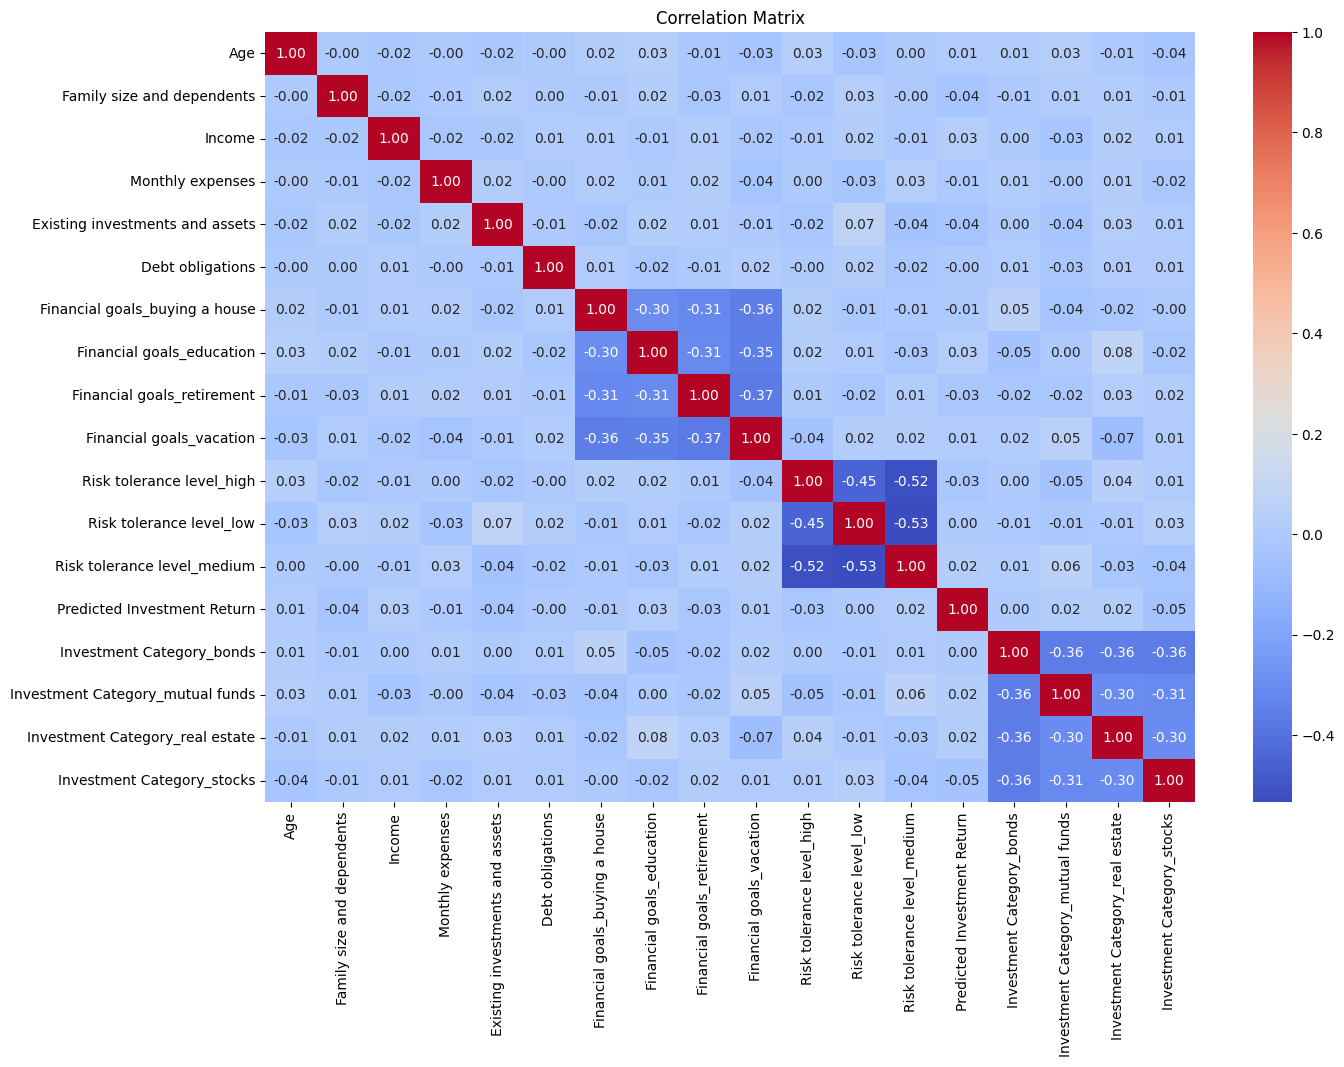

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### **3.5.Visualization of Investment Outcomes**

### 3.5.1.Distribution of 'Predicted Investment Return'

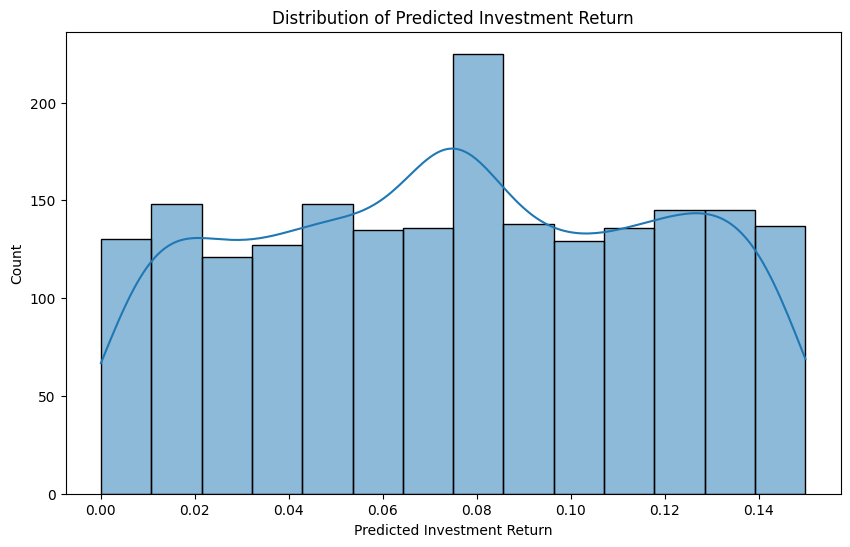

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Predicted Investment Return'], kde=True)
plt.title('Distribution of Predicted Investment Return')
plt.show()


### 5.5.2.Relationship between 'Investment Category' and 'Predicted Investment Return'

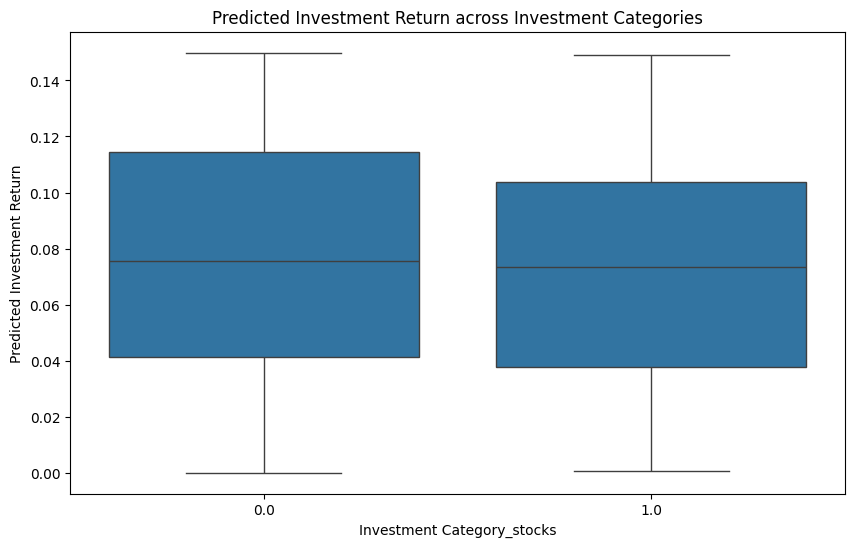

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Investment Category_stocks', y='Predicted Investment Return')
plt.title('Predicted Investment Return across Investment Categories')
plt.show()

# **4.Model Development**

For the model development we will follow the following steps <br>
1) Data Preparation <br>
2) Model Implementation <br>
3) Model Evaluation

### **4.1.Data Preparation**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier

# Load the preprocessed dataset
df = pd.read_csv('investment_data_preprocessed.csv')

# Split the data into features and target variables
X = df.drop(['Predicted Investment Return', 'Investment Category_stocks'], axis=1)
y_reg = df['Predicted Investment Return']
y_clf = df['Investment Category_stocks']

# Split the data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_clf, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_reg = scaler.fit_transform(X_train_reg)
X_test_reg = scaler.transform(X_test_reg)
X_train_clf = scaler.fit_transform(X_train_clf)
X_test_clf = scaler.transform(X_test_clf)


### **4.2.Regression Models**
1) Linear Regression<br>
2) Decision Tree Regressor<br>
3) Random Forest Regressor<br>
4) Gradient Boosting Regressor<br>

 4.2.1.Linear Regression

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg, y_train_reg)
y_pred_lin_reg = lin_reg.predict(X_test_reg)
rmse_lin_reg = mean_squared_error(y_test_reg, y_pred_lin_reg, squared=False)
print(f'Linear Regression RMSE: {rmse_lin_reg}')

Linear Regression RMSE: 0.0424911306929846


4.2.2.Decision Tree Regressor

In [ ]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train_reg, y_train_reg)
y_pred_tree_reg = tree_reg.predict(X_test_reg)
rmse_tree_reg = mean_squared_error(y_test_reg, y_pred_tree_reg, squared=False)
print(f'Decision Tree Regressor RMSE: {rmse_tree_reg}')

Decision Tree Regressor RMSE: 0.06193813816138068


4.2.3.Random Forest Regressor

In [ ]:
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train_reg, y_train_reg)
y_pred_forest_reg = forest_reg.predict(X_test_reg)
rmse_forest_reg = mean_squared_error(y_test_reg, y_pred_forest_reg, squared=False)
print(f'Random Forest Regressor RMSE: {rmse_forest_reg}')

Random Forest Regressor RMSE: 0.042905866605952685


4.2.4.Gradient Boosting Regressor

In [ ]:
gboost_reg = GradientBoostingRegressor()
gboost_reg.fit(X_train_reg, y_train_reg)
y_pred_gboost_reg = gboost_reg.predict(X_test_reg)
rmse_gboost_reg = mean_squared_error(y_test_reg, y_pred_gboost_reg, squared=False)
print(f'Gradient Boosting Regressor RMSE: {rmse_gboost_reg}')

Gradient Boosting Regressor RMSE: 0.0437670025602668


4.2.5.Comparison Between the regression models (RMES score)

<ipython-input-29-e66ab8492867>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(rmse_scores.keys()), y=list(rmse_scores.values()), palette='viridis')


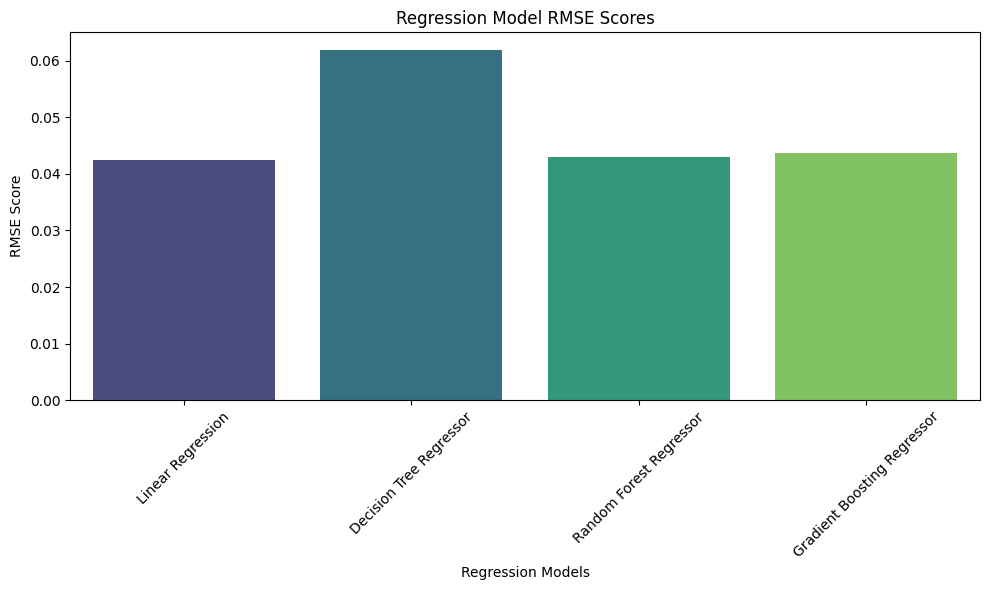

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume these are your RMSE scores from different regression models
rmse_scores = {
    'Linear Regression': 0.0424911306929846,
    'Decision Tree Regressor': 0.06193813816138068,
    'Random Forest Regressor': 0.042905866605952685,
    'Gradient Boosting Regressor': 0.0437670025602668,

}

# Create a bar plot for RMSE scores
plt.figure(figsize=(10, 6))
sns.barplot(x=list(rmse_scores.keys()), y=list(rmse_scores.values()), palette='viridis')
plt.title('Regression Model RMSE Scores')
plt.xlabel('Regression Models')
plt.ylabel('RMSE Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### **4.3.Classification Models**
1)Logistic Regression<br>
2)Decision Tree Classifier<br>
3)Random Forest Classifier<br>
4)Gradient Boosting Classifier<br>

4.3.1. Logistic Regression

In [ ]:
log_clf = LogisticRegression(max_iter=1000)
log_clf.fit(X_train_clf, y_train_clf)
y_pred_log_clf = log_clf.predict(X_test_clf)
acc_log_clf = accuracy_score(y_test_clf, y_pred_log_clf)
print(f'Logistic Regression Accuracy: {acc_log_clf}')

Logistic Regression Accuracy: 1.0


4.3.2.Decision Tree Classifier

In [ ]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train_clf, y_train_clf)
y_pred_tree_clf = tree_clf.predict(X_test_clf)
acc_tree_clf = accuracy_score(y_test_clf, y_pred_tree_clf)
print(f'Decision Tree Classifier Accuracy: {acc_tree_clf}')


Decision Tree Classifier Accuracy: 1.0


4.3.3.Random Forest Classifier

In [ ]:
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train_clf, y_train_clf)
y_pred_forest_clf = forest_clf.predict(X_test_clf)
acc_forest_clf = accuracy_score(y_test_clf, y_pred_forest_clf)
print(f'Random Forest Classifier Accuracy: {acc_forest_clf}')

Random Forest Classifier Accuracy: 1.0


4.3.4.Gradient Boosting Classifier

In [ ]:
gboost_clf = GradientBoostingClassifier()
gboost_clf.fit(X_train_clf, y_train_clf)
y_pred_gboost_clf = gboost_clf.predict(X_test_clf)
acc_gboost_clf = accuracy_score(y_test_clf, y_pred_gboost_clf)
print(f'Gradient Boosting Classifier Accuracy: {acc_gboost_clf}')

Gradient Boosting Classifier Accuracy: 1.0


4.3.5.Comparision between the classification model (Accuracy)

<ipython-input-30-4cfb017385da>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette='viridis')


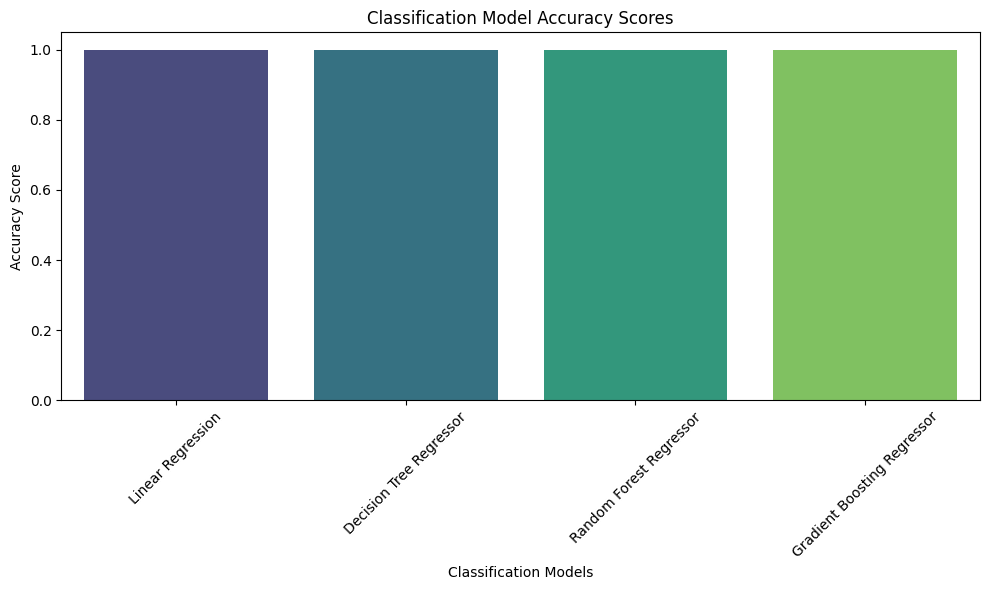

In [ ]:
# Assume these are your accuracy scores from different classification models
accuracy_scores = {
    'Linear Regression': 1.0,
    'Decision Tree Regressor': 1.0,
    'Random Forest Regressor': 1.0,
    'Gradient Boosting Regressor': 1.0,
}

# Create a bar plot for accuracy scores
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette='viridis')
plt.title('Classification Model Accuracy Scores')
plt.xlabel('Classification Models')
plt.ylabel('Accuracy Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **5.Testing and Validation**

### **5.1.Split the Data into Training and Testing Sets**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load the preprocessed dataset
df = pd.read_csv('/content/investment_data_preprocessed.csv')

# Split the data into features and target variables
X = df.drop(['Predicted Investment Return', 'Investment Category_stocks'], axis=1)
y_reg = df['Predicted Investment Return']  # Regression target
y_clf = df['Investment Category_stocks']  # Classification target

# Split the data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_clf, test_size=0.2, random_state=42)


### **5.2.Training the model on Training set**

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

# Train regression models
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg, y_train_reg)

dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train_reg, y_train_reg)

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train_reg, y_train_reg)

# Train classification models
log_clf = LogisticRegression(max_iter=1000)
log_clf.fit(X_train_clf, y_train_clf)

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train_clf, y_train_clf)

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_clf, y_train_clf)


RandomForestClassifier()

### **5.3.Evaluate the model on the training dataset**

In [ ]:
from sklearn.metrics import mean_squared_error, accuracy_score

# Evaluate regression models
y_pred_lin_reg = lin_reg.predict(X_test_reg)
rmse_lin_reg = mean_squared_error(y_test_reg, y_pred_lin_reg, squared=False)

y_pred_dt_reg = dt_reg.predict(X_test_reg)
rmse_dt_reg = mean_squared_error(y_test_reg, y_pred_dt_reg, squared=False)

y_pred_rf_reg = rf_reg.predict(X_test_reg)
rmse_rf_reg = mean_squared_error(y_test_reg, y_pred_rf_reg, squared=False)

print(f'Linear Regression RMSE: {rmse_lin_reg}')
print(f'Decision Tree Regression RMSE: {rmse_dt_reg}')
print(f'Random Forest Regression RMSE: {rmse_rf_reg}')

# Evaluate classification models
y_pred_log_clf = log_clf.predict(X_test_clf)
acc_log_clf = accuracy_score(y_test_clf, y_pred_log_clf)

y_pred_dt_clf = dt_clf.predict(X_test_clf)
acc_dt_clf = accuracy_score(y_test_clf, y_pred_dt_clf)

y_pred_rf_clf = rf_clf.predict(X_test_clf)
acc_rf_clf = accuracy_score(y_test_clf, y_pred_rf_clf)

print(f'Logistic Regression Accuracy: {acc_log_clf}')
print(f'Decision Tree Classification Accuracy: {acc_dt_clf}')
print(f'Random Forest Classification Accuracy: {acc_rf_clf}')


Linear Regression RMSE: 0.04249051139164138
Decision Tree Regression RMSE: 0.061301708578903456
Random Forest Regression RMSE: 0.042993330286107655
Logistic Regression Accuracy: 1.0
Decision Tree Classification Accuracy: 1.0
Random Forest Classification Accuracy: 1.0


### **5.4.Fine tune the Models**

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.linear_model import LinearRegression

# Example: Fine-tune Random Forest Classifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [ 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_clf, y_train_clf)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation score: {grid_search.best_score_}')


Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation score: 1.0


# **6.Display the Prediction**

### **Prediction for both type of Model**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, accuracy_score

# Load the preprocessed dataset
df = pd.read_csv('/content/investment_data_preprocessed.csv')

# Split the data into features and target variables
X = df.drop(['Predicted Investment Return', 'Investment Category_stocks'], axis=1)
y_reg = df['Predicted Investment Return']  # Regression target
y_clf = df['Investment Category_stocks']  # Classification target

# Split the data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_clf, test_size=0.2, random_state=42)

# Train and evaluate Random Forest Regressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train_reg, y_train_reg)
y_pred_rf_reg = rf_reg.predict(X_test_reg)
rmse_rf_reg = mean_squared_error(y_test_reg, y_pred_rf_reg, squared=False)
print(f'Random Forest Regression RMSE: {rmse_rf_reg}')

# Display sample predictions vs actual values for regression
regression_results = pd.DataFrame({'Actual': y_test_reg, 'Predicted': y_pred_rf_reg})
print("Regression Results:\n", regression_results.head(10))

# Train and evaluate Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_clf, y_train_clf)
y_pred_rf_clf = rf_clf.predict(X_test_clf)
acc_rf_clf = accuracy_score(y_test_clf, y_pred_rf_clf)
print(f'Random Forest Classification Accuracy: {acc_rf_clf}')

# Display sample predictions vs actual values for classification
classification_results = pd.DataFrame({'Actual': y_test_clf, 'Predicted': y_pred_rf_clf})
print("Classification Results:\n", classification_results.head(10))


Random Forest Regression RMSE: 0.04257074796552428
Regression Results:
         Actual  Predicted
1860  0.116421   0.074337
353   0.086942   0.084530
1333  0.061574   0.063444
905   0.019775   0.075403
1289  0.035520   0.063848
1273  0.053301   0.081695
938   0.125099   0.085507
1731  0.146091   0.071849
65    0.055548   0.078050
1323  0.060413   0.080852
Random Forest Classification Accuracy: 1.0
Classification Results:
       Actual  Predicted
1860     1.0        1.0
353      0.0        0.0
1333     1.0        1.0
905      0.0        0.0
1289     1.0        1.0
1273     0.0        0.0
938      0.0        0.0
1731     0.0        0.0
65       0.0        0.0
1323     0.0        0.0


# **7.Taking input from the user**

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the preprocessed dataset
df = pd.read_csv('/content/investment_data_preprocessed.csv')

# Drop any rows with missing values to simplify the example
df.dropna(inplace=True)

# Split the data into features and target variables
X = df.drop(['Predicted Investment Return', 'Investment Category_stocks'], axis=1)
y_reg = df['Predicted Investment Return']  # Regression target

# Split the data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)

# Train the Random Forest Regressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train_reg, y_train_reg)

# Predict on the test set and evaluate
y_pred_rf_reg = rf_reg.predict(X_test_reg)
rmse_rf_reg = mean_squared_error(y_test_reg, y_pred_rf_reg, squared=False)
print(f'Random Forest Regression RMSE: {rmse_rf_reg}')

# Define a function to get user input and predict the investment return
def get_user_input_and_predict():
    # Input features from the user
    age = int(input("Enter age: "))
    family_size_and_dependents = int(input("Enter family size and dependents: "))
    income = float(input("Enter income: "))
    monthly_expenses = float(input("Enter monthly expenses: "))
    existing_investments_and_assets = float(input("Enter existing investments and assets: "))
    debt_obligations = float(input("Enter debt obligations: "))
    financial_goals = input("Enter financial goals (e.g., buying a house, retirement, education, vacation): ").strip().lower()
    risk_tolerance_level = input("Enter risk tolerance level (low, medium, high): ").strip().lower()

    # Create a DataFrame with the user input
    user_data = pd.DataFrame({
        'Age': [age],
        'Family size and dependents': [family_size_and_dependents],
        'Income': [income],
        'Monthly expenses': [monthly_expenses],
        'Existing investments and assets': [existing_investments_and_assets],
        'Debt obligations': [debt_obligations],
        'Financial goals_buying a house': [1 if financial_goals == 'buying a house' else 0],
        'Financial goals_education': [1 if financial_goals == 'education' else 0],
        'Financial goals_retirement': [1 if financial_goals == 'retirement' else 0],
        'Financial goals_vacation': [1 if financial_goals == 'vacation' else 0],
        'Risk tolerance level_high': [1 if risk_tolerance_level == 'high' else 0],
        'Risk tolerance level_low': [1 if risk_tolerance_level == 'low' else 0],
        'Risk tolerance level_medium': [1 if risk_tolerance_level == 'medium' else 0],
        'Investment Category_bonds': [0],
        'Investment Category_mutual funds': [0],
        'Investment Category_real estate': [0]
    })

    # Predict the investment return using the trained model
    predicted_return = rf_reg.predict(user_data)
    print(f'Predicted Investment Return: {predicted_return[0]}')

# Call the function to get user input and predict the investment return
get_user_input_and_predict()


Random Forest Regression RMSE: 0.04256683473941287
Enter age: 56
Enter family size and dependents: 5
Enter income: 141041
Enter monthly expenses: 1026
Enter existing investments and assets: 580178
Enter debt obligations: 19510
Enter financial goals (e.g., buying a house, retirement, education, vacation): buying a house
Enter risk tolerance level (low, medium, high): medium
Predicted Investment Return: 0.0694345006520987


# **8.Conclusion**

Here We have implemented the Investment prediction model for investment returns on that basis a user can decide wheather to invest in a stock/bond/mutual funds/real estate/stocks by analysing the return value.Higher the return value ,it is good to invest in  that and if it has a lower value the user should think twice before investing in that .<br>

Here ,I have used both the regression type of the model for the investment return prediction and classification type of the model to analyse the investment category .The models which I have implemented are listed below :<br>
1)Linear Regression<br>
2)Decision Tree Regressor <br>
3)Random Forest Regressor<br>
4)Gradient Boosting Regressor<Br>
5)Logistic Regression<br>
6)Decision Tree Classifier<br>
7)Random Forest Classifier<br>
8)Gradient Boosting Classifier<br>
